# 第4章 機械学習の体験

## 問題

ワインの成分の情報から、ワインの種類を判断する決定木モデルを構築しましょう。

読み込むCSVファイル  「wine.csv」

### データを読み込む

問1  
「wine.csv」を読み込み、先頭の5行を表示してください

In [ ]:
# pandasをインポート
import pandas as pd
# CSVファイルを読み込み、変数dfに入れる
df = pd.read_csv("wine.csv")

# 変数dfの先頭5行を表示する
df.head()

,アルコール度数,リンゴ酸,色の濃さ,色合い,品種
0,14.23,1.71,5.64,1.04,種類A
1,13.20,1.78,4.38,1.05,種類A
2,13.16,2.36,5.68,1.03,種類A
3,14.37,1.95,7.80,0.86,種類A
4,13.24,2.59,4.32,1.04,種類A


▶実行結果

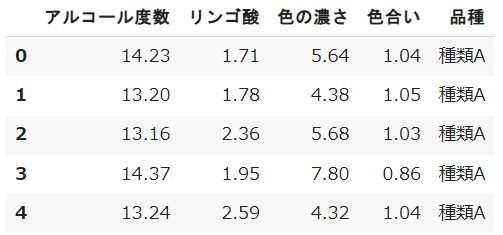

### 特徴量と正解データに分割する

特徴量と正解データは以下の列とします。
* 特徴量：「アルコール度数」「リンゴ酸」「色の濃さ」「色合い」  
* 正解データ：「品種」

問2  
特徴量の列を変数Xに入れ、先頭5行を表示してください

In [ ]:
X = df.iloc[:, 0:-1]

X.head()

,アルコール度数,リンゴ酸,色の濃さ,色合い
0,14.23,1.71,5.64,1.04
1,13.20,1.78,4.38,1.05
2,13.16,2.36,5.68,1.03
3,14.37,1.95,7.80,0.86
4,13.24,2.59,4.32,1.04


▶実行結果

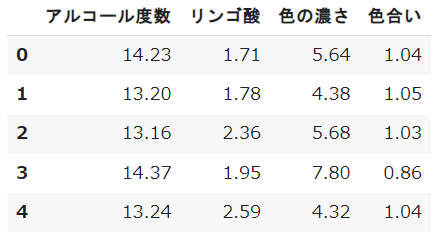

問3  
正解データの列を変数yに入れ、先頭5行を表してください

In [ ]:
y = df.iloc[:, -1]

y.head()

0    種類A
1    種類A
2    種類A
3    種類A
4    種類A
Name: 品種, dtype: object

▶実行結果

0    種類A  
1    種類A  
2    種類A  
3    種類A  
4    種類A  
Name: 品種, dtype: object

### 学習と評価

問4  
問2、問3で分割した特徴量、正解データを用いて、決定木モデルに学習させてください

In [ ]:
# treeモジュールのインポート
from sklearn import tree

# 決定木モデルを生成し、変数modelに入れる（乱数シードは0にする）
model = tree.DecisionTreeClassifier(random_state = 0)

# 学習を実行する
model.fit(X, y)

DecisionTreeClassifier(random_state=0)

問5  
問2、問3で分割した特徴量、正解データを用いて、学習済みモデルの正解率を表示してください

In [ ]:
model.score(X, y)

1.0

▶実行結果

1.0

問6  
以下の表のデータで予測し、結果を表示してください

			
|アルコール度数|リンゴ酸|色の濃さ|色合い|
| ----: | ----: | ----: | ----: |
|13|2|2|0.78|

In [ ]:
data = [[13, 2, 2, 0.78]]
model.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['種類B'], dtype=object)

▶実行結果

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"  
array(['種類B'], dtype=object)

### モデルの保存

問7  
学習済みモデルを「chapter04_model01.pkl」という名前で保存してください

In [ ]:
# pickleのインポート
import pickle

# ファイルを書き込みモードで開き、モデルをpickle形式で保存する
with open("chapter04_model01.pkl", "wb") as f:
  pickle.dump(model, f)

問8  
保存した「chapter04_model01.pkl」を読み込み、変数model2に代入してください

In [ ]:
with open("chapter04_model01.pkl", "rb") as f:
  model2 = pickle.load(f)

問9  
model2を使用して以下の表のデータで予測し、結果を表示してください

			
|アルコール度数|リンゴ酸|色の濃さ|色合い|
| ----: | ----: | ----: | ----: |
|14|4|6|0.5|

In [ ]:
data = [[14, 4, 6, 0.5]]
model2.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['種類C'], dtype=object)

▶実行結果

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"  
array(['種類C'], dtype=object)